<head>
    <h1>Model selection of GLM </h1>
    <p>AIC and goodness of prediction</p>
</head>

In [3]:
ls ../data

data.RData  data3a.csv  data4a.csv  data_R.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set();

In [5]:
df = pd.read_csv('../data/data3a.csv')

In [6]:
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


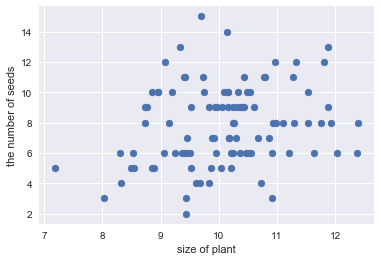

In [7]:
plt.scatter(df['x'], df['y']) 
plt.xlabel("size of plant")
plt.ylabel("the number of seeds")
plt.show()

In [8]:
import statsmodels.api as sm

/Users/kentasuzuki/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
import statsmodels.formula.api as smf

In [10]:
results = smf.glm('y ~ 1', data=df,
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 22 Oct 2018   Deviance:                       89.507
Time:                        22:12:35   Pearson chi2:                     87.1
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128


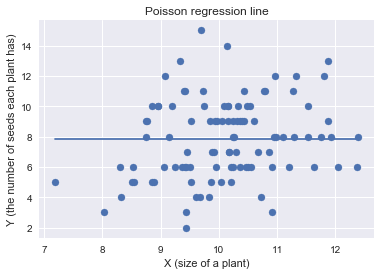

In [11]:
plt.scatter(df['x'], df['y']) 
plt.xlabel("size of plant")
plt.ylabel("the number of seeds")
xx = np.linspace(np.min(df['x']), np.max(df['x']),100)
plt.plot(xx, np.exp(2.0580 + 0 * xx))
plt.xlabel("X (size of a plant)")
plt.ylabel("Y (the number of seeds each plant has)")
plt.title("Poisson regression line")
plt.show()

In [12]:
results = smf.glm('y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4) + \
                  np.power(x, 5) + np.power(x, 6)' , data=df,
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       93
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -232.58
Date:                Mon, 22 Oct 2018   Deviance:                       79.385
Time:                        22:12:35   Pearson chi2:                     76.7
No. Iterations:                     4                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8185.6246   7764.790      1.054      0.292   -7033.084    2.34e+04
x              -4980.3818   4833.718    

In [13]:
results.params

Intercept         8185.624606
x                -4980.381838
np.power(x, 2)    1251.805404
np.power(x, 3)    -166.411214
np.power(x, 4)      12.344999
np.power(x, 5)      -0.484704
np.power(x, 6)       0.007871
dtype: float64

In [14]:
print(len(results.predict()))
print(len(df['x']))

100
100


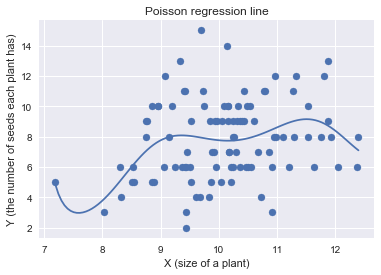

In [15]:
plt.scatter(df['x'], df['y']) 
plt.xlabel("size of plant")
plt.ylabel("the number of seeds")
xx = np.linspace(np.min(df['x']), np.max(df['x']),100)
plt.plot(xx, np.exp(results.params[0] + results.params[1] * xx + results.params[2] * np.power(xx, 2) 
                    + results.params[3] * np.power(xx,3) + results.params[4] * np.power(xx,4) 
                    + results.params[5] * np.power(xx,5) + results.params[6] * np.power(xx,6)))
plt.xlabel("X (size of a plant)")
plt.ylabel("Y (the number of seeds each plant has)")
plt.title("Poisson regression line")
plt.show()

In [16]:
results = smf.glm('y ~ x', data=df,
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 22 Oct 2018   Deviance:                       84.993
Time:                        22:12:35   Pearson chi2:                     83.8
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.0

In [17]:
print("Null Deviance {0:.2f}".format(results.null_deviance))
print("Residual Deviance {0:.2f}".format(results.deviance))
print("AIC {0:.2f}".format(results.aic))

Null Deviance 89.51
Residual Deviance 84.99
AIC 474.77


<h2>The badness of fittness</h2>
<h3>Deviance = -2 logL </h3>
<p>where logL is a maximum log-likelihood estimate</p>
<h3>Residual deviance = D - (the minimum deviance that can be explained by Possion distribution)</h3>
<p>where the minimum deviance = the deviance of full model</p>
<h3>Full model is a model with the number of parameters being equal to the number of datasets</h3>
<p>For example, in fitting a Poisson distribution to the dataset, if the response variable, y, takes on values, 
    y<sub>i</sub> = {6,6,6,12,10}, then full model uses parameters, $\lambda$<sub>i</sub> =  {6,6,6,12,10}</p>
<p>Log-liklihood is the biggest (in any other Poisson models) when full model is used</p>

In [18]:
import scipy
from scipy.stats import poisson

In [31]:
mlle_full_model = np.sum(np.log(poisson.pmf(df['y'], df['y'])))
deviance_full_model = -2 * mlle_full_model
# mle_full_model = np.sum(poisson.logpmf(df['y'], df['y']))
print('MLE of full model {0:.2f}'.format(mlle_full_model))
print('Deviance of full model {0:.2f}'.format(deviance_full_model))
rd = d - deviance_full_model
print("Residual Deviance: {0:.3f}".format(rd))

MLE of full model -192.89
Deviance of full model 385.78
Residual Deviance: 85.000


<h3>Residual deviance is the biggest when a model has one parameter (this model is called 'null model' in R language)</h3>

<p>Null model: log$\lambda$<sub>i</sub> = $\beta$<sub>i</sub></p>

In [37]:
null_results = smf.glm('y ~ 1', data=df,
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(null_results.summary())
print('AIC of null model is: {0}'.format(null_results.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 22 Oct 2018   Deviance:                       89.507
Time:                        22:26:37   Pearson chi2:                     87.1
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128
AIC of null model is: 477.2864426185734


In [34]:
print(null_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 22 Oct 2018   Deviance:                       89.507
Time:                        22:23:48   Pearson chi2:                     87.1
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128


<h2>4.4 Model Selection Criterion</h2>
<h3>AIC (Akaike's information criterion)</h3>

<p>AIC&emsp;= -2 {(maximum log-likelihood estimate) - (the number of parameters inferred by maximum likelihood estimate)}<br>
&emsp;&emsp;&emsp;= -2 (logL - k)<br>
&emsp;&emsp;&emsp;= D+2k</p> 
<p>A model with the minimum AIC is a good estimator</p>

In [44]:
from scipy.stats import poisson

In [254]:
def poisson_sampling(mu, size, data_size):
    """generate random numbers from Poission distriubtion with some specified parameters
    
    # Arguments
       mu: mean of Poission distribution 
       size: the number of samples to be generated from Poission distribution 
       data_size: the number of datasets to be generated from Poisson distribution
    """
    ys = []
    for _ in range(data_size):
        data = poisson.rvs(mu=mu, size=size, random_state=43)
        ys.append(data)
    return ys

In [255]:
ys = sampling(mu=8, size=50, data_size=1)

In [290]:
def plot_log_likelihood(data, mu):
    """Plot log likelihood based on generated data
    
    # Arguments
       data: generated data from probability distribution
    """
    mus = np.arange(1.80, 10.20, 0.5)
    true_lambda = mu
    log_ls = []
    first_data = data[0]
    for mu in mus:
        rv = poisson(mu=mu)
        log_l = np.sum(np.log(rv.pmf(first_data)))
        log_ls.append(log_l)
    estimated_lambda = mus[np.argmax(log_ls)]
    plt.figure(figsize=(10, 5))
    plt.plot(mus, log_ls, 'bo--') 
    plt.plot(true_lambda, np.min(log_ls)+2, 'ro')
    plt.plot(mus[np.argmax(log_ls)], np.min(log_ls)+2, 'bo')
    plt.vlines(x=mus[np.argmax(log_ls)], ymin=np.min(log_ls),
               ymax=np.max(log_ls), linestyle='dashed')
    plt.ylabel("Log likelihood")
    plt.ylim(np.min(log_ls), np.max(log_ls))
    plt.xlabel("$\lambda$")
    plt.annotate("$\^\lambda$ = {0:.2f}".format(estimated_lambda),
                 xy=(estimated_lambda, np.min(log_ls)), xytext=(estimated_lambda+1, 
            np.min(log_ls) + 0.5), arrowprops=dict(facecolor='black', shrink=0.07))
    plt.annotate("$\lambda$ = {0:.2f}".format(true_lambda), xy=(true_lambda, np.min(log_ls)), xytext=(true_lambda-1, 
            np.min(log_ls) + 0.5), arrowprops=dict(facecolor='red', shrink=0.07))
    plt.title("Maximum likelihood estimate for 1st dataset")
    plt.show()

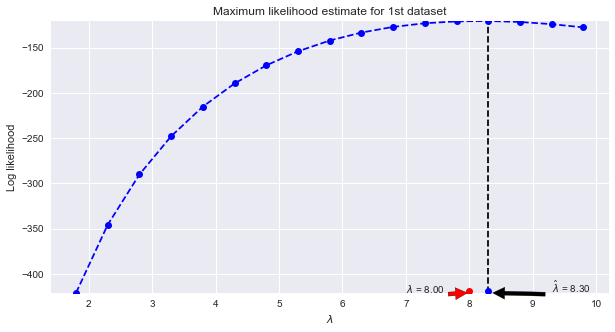

In [292]:
plot_log_likelihood(ys,mu=8)

In [285]:
print(len(ys))
print(len(ys[0]))
print(np.mean(ys[0]))

1
50
8.18


In [40]:
def random_generator(mu, sigma, size):
    return np.absolute(np.random.normal(mu, sigma, size).astype(np.int64))

def create_random_df():
    mus = [10, 8]
    sigmas = [2,5]
    size = 100
    rand_nums = []
    for mu, sigma in zip(mus, sigmas):
        rand_nums.append(random_generator(mu, sigma, size))
    d = {'x': rand_nums[0], 'y': rand_nums[1]}
    df = pd.DataFrame(data=d)
    return df

In [41]:
df_rand = create_random_df()

In [42]:
df_rand.head()
print(df_rand.shape)

(100, 2)


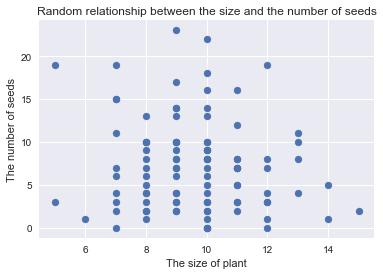

In [43]:
plt.scatter(df_rand['x'], df_rand['y'])
plt.xlabel("The size of plant")
plt.ylabel("The number of seeds")
plt.title("Random relationship between the size and the number of seeds")
plt.show()